<a href="https://colab.research.google.com/github/Mphohlalele90/ai-future-directions/blob/main/edge_ai_image_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Future Directions – PLP Assignment

PART 1: THEORETICAL ANALYSIS

Q1: How Edge AI Reduces Latency and Enhances Privacy

Edge AI refers to running artificial intelligence models directly on edge devices (e.g., smartphones, drones, sensors) instead of relying on cloud-based systems.

**Latency**: In Edge AI, data is processed locally, which reduces the time delay caused by sending data to the cloud and back. This is critical in real-time systems like autonomous drones or self-driving cars.

**Privacy**: Since data remains on the device, it minimizes the risk of exposure or interception during data transfer. This is especially valuable in healthcare or surveillance scenarios.

**Example**: Autonomous drones use Edge AI to detect and avoid obstacles in real time. Delays from cloud-based processing would result in crashes, making Edge AI a necessity for safety.

Q2: Compare Quantum AI and Classical AI in Optimization

**Classical AI** solves optimization problems using deterministic algorithms like gradient descent or genetic algorithms. These methods work well but can struggle with large, complex datasets and multiple variables.

**Quantum AI**, however, uses quantum bits (qubits) which can represent multiple states simultaneously through superposition. This allows exploration of many potential solutions at once, drastically accelerating optimization.

**Industries that benefit from Quantum AI**:
- **Pharmaceuticals**: for drug discovery simulations.
- **Finance**: for high-speed portfolio optimization.
- **Logistics**: for efficient route planning and resource allocation.

Quantum AI promises faster solutions for problems that are currently too complex or time-consuming for classical computing.

Q3: Societal Impact of Human-AI Collaboration in Healthcare

Human-AI collaboration in healthcare refers to the partnership between medical professionals and intelligent systems.

**Radiologists** can use AI to pre-screen images and highlight abnormalities, reducing diagnostic time and improving accuracy. AI can detect patterns in medical imaging that are too subtle for the human eye.

**Nurses** benefit from AI-powered monitoring systems that predict patient deterioration based on vitals, allowing for proactive care.

**Impact**:
- Increases efficiency and accuracy.
- Reduces human error.
- Frees up time for professionals to focus on patient care and emotional support.

However, ethical concerns arise regarding overreliance on AI and job displacement. Responsible integration is key.

Case Study: AI in Smart Cities – Traffic Management

**How AI + IoT Improves Urban Sustainability:**

Integrating AI with IoT enables smarter traffic systems through real-time data analysis. AI can process inputs from IoT sensors (e.g., traffic cameras, vehicle counters) to:
- Optimize traffic signal timing.
- Reduce congestion and vehicle emissions.
- Predict peak traffic hours and reroute vehicles.

**Two Challenges:**
1. **Data Security** – IoT devices can be vulnerable to hacking, which can disrupt critical systems or leak private location data.
2. **Infrastructure Cost** – Installing and maintaining smart traffic systems is expensive, especially in developing countries.


PART 2: PRACTICAL IMPLEMENTATION

In [1]:
# Edge AI Image Classifier - PLP Assignment
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load example dataset
dataset = keras.utils.get_file(
    origin="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    fname="flower_photos", extract=True)

import pathlib
data_dir = pathlib.Path(dataset)

# Load data
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Normalize
normalization_layer = tf.keras.layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=3)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9450 - loss: 0.0905 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [2]:
# Convert to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print(" TFLite model saved successfully!")

Saved artifact at '/tmp/tmpwy1f90hq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  134887015060048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134887015062544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134887015063120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134887015060240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134887015062352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134887015059280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134887015059472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134887015064080: TensorSpec(shape=(), dtype=tf.resource, name=None)
 TFLite model saved successfully!


Task 2: AI-Driven IoT Concept – Smart Agriculture

## Smart Agriculture System with AI and IoT

**Sensors Needed**:
- Soil Moisture
- Air Temperature
- Humidity
- pH Sensor
- Sunlight Intensity

**AI Model**:
- Use LSTM or Random Forest to predict crop yields based on real-time sensor input + historical data.

**How it Works**:
1. Sensors collect environmental data.
2. Data is sent to the edge processor or cloud.
3. AI model analyzes patterns and forecasts yield or suggests irrigation.
4. Farmers receive alerts or actions through a dashboard or app.


In [ ]:
from google.colab import files
files.upload()

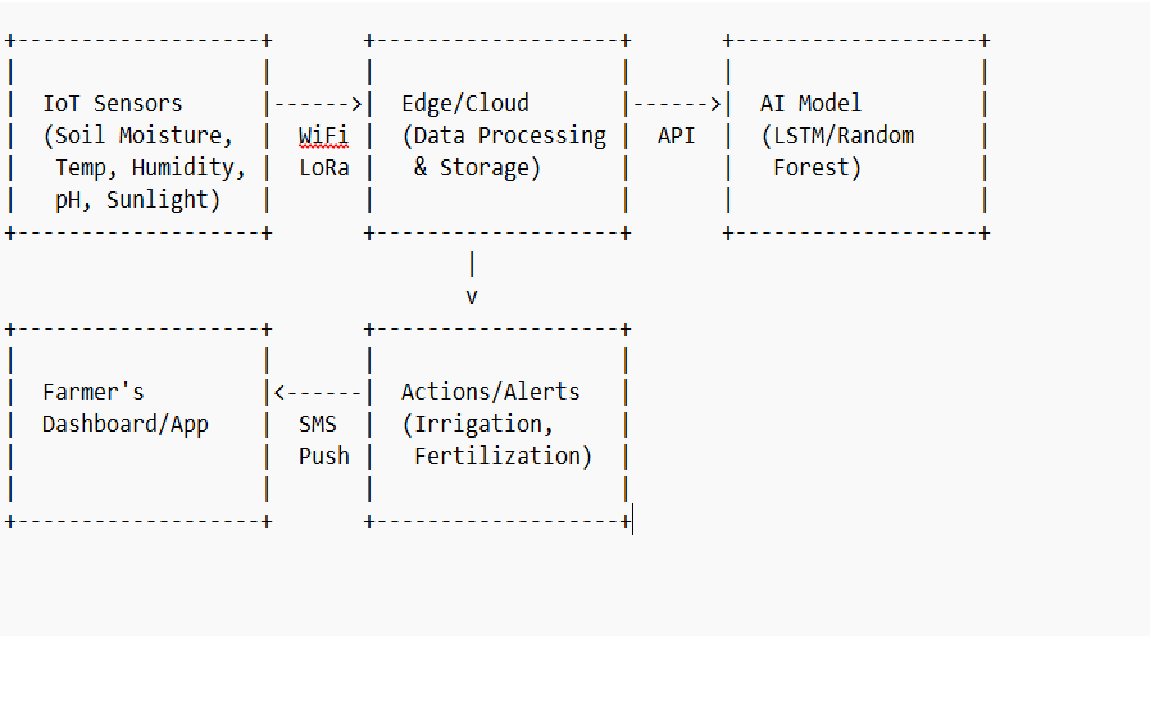

In [4]:
from IPython.display import Image
Image('loT.png')

Task 3: Ethics in Personalized Medicine



AI in personalized medicine uses data such as genome sequences and medical history to recommend targeted treatments. While powerful, it presents ethical concerns — especially in underrepresented populations.

**Bias Risk**:
Many AI models are trained on data from North American or European populations. This may exclude ethnic minorities from accurate prediction models, leading to misdiagnoses or ineffective treatments.

**Example**:
A model trained mostly on Caucasian patients may not detect certain cancer markers in African patients. This results in inequitable care and worsens existing health disparities.

**Strategies for Fairness**:
1. **Inclusive Datasets**: Encourage data collection across all demographics and ethnicities.
2. **Bias Testing**: Regular audits to evaluate model performance across different groups.
3. **Regulations**: Governments and health bodies must enforce transparency and fairness standards in clinical AI tools.

Responsible AI in medicine must prioritize **equity** and **accountability** to truly improve global healthcare outcomes.

PART 3: FUTURISTIC PROPOSAL (2030 AI Application)

**Problem**:
Water shortages and poor distribution in rural and drought-prone areas.

**AI Solution**:
An AI system that uses satellite images + ground sensors to:
- Monitor river and dam levels
- Predict shortages
- Recommend water redistribution or conservation actions

**Workflow**:
- **Input**: Satellite imagery, rainfall, water usage patterns
- **Model**: LSTM + CNN for forecasting water scarcity
- **Output**: Action plans or alerts for water authorities and farmers

**Risks & Benefits**:
- Prevents crises, improves planning, saves lives
-  Needs privacy safeguards for local community data
-  Requires investment in infrastructure

This solution promotes sustainability, aligns with climate change goals, and ensures fair water access.